In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys 
sys.path.insert(0, './')

In [3]:
df = pd.read_csv('prices_round_4_day_1.csv',index_col='timestamp', sep=';')

In [4]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,1,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
0,1,COCONUT_COUPON,637,39,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
100,1,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
100,1,COCONUT_COUPON,637,33,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
200,1,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999700,1,COCONUT_COUPON,681,46,NaN,NaN,NaN,NaN,682,46,NaN,NaN,NaN,NaN,681.5,0.0
999800,1,COCONUT_COUPON,681,43,NaN,NaN,NaN,NaN,682,43,NaN,NaN,NaN,NaN,681.5,0.0
999800,1,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,181,NaN,NaN,NaN,NaN,10135.0,0.0


In [6]:
df_coconut = df.loc[df['product']=='COCONUT'][['mid_price']].rename(columns={'mid_price': 'coconut'})
df_coconut_coupon = df.loc[df['product']=='COCONUT_COUPON'][['mid_price']].rename(columns={'mid_price': 'coconut_coupon'})

df = pd.concat([df_coconut, df_coconut_coupon], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price               
            coconut coconut_coupon
timestamp                         
0           10000.0          637.5
100          9999.5          637.5
200          9998.5          637.5
300          9999.5          638.5
400          9998.5          637.5
...             ...            ...
999500      10135.5          681.5
999600      10136.5          682.5
999700      10134.5          681.5
999800      10135.0          681.5
999900      10135.0          682.5

[10000 rows x 2 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

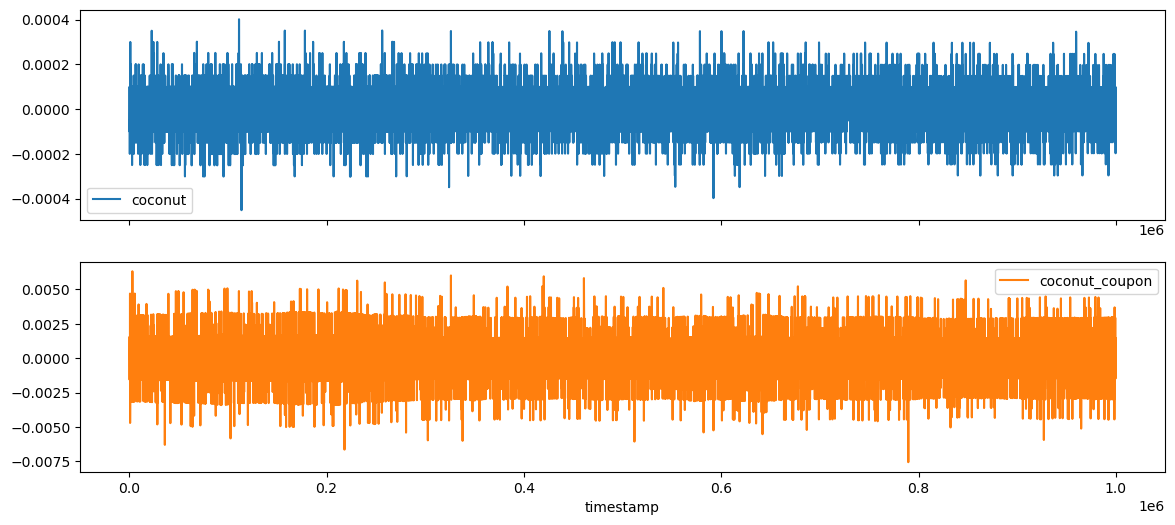

In [7]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))


array([[<Axes: xlabel='coconut', ylabel='coconut'>,
        <Axes: xlabel='coconut_coupon', ylabel='coconut'>],
       [<Axes: xlabel='coconut', ylabel='coconut_coupon'>,
        <Axes: xlabel='coconut_coupon', ylabel='coconut_coupon'>]],
      dtype=object)

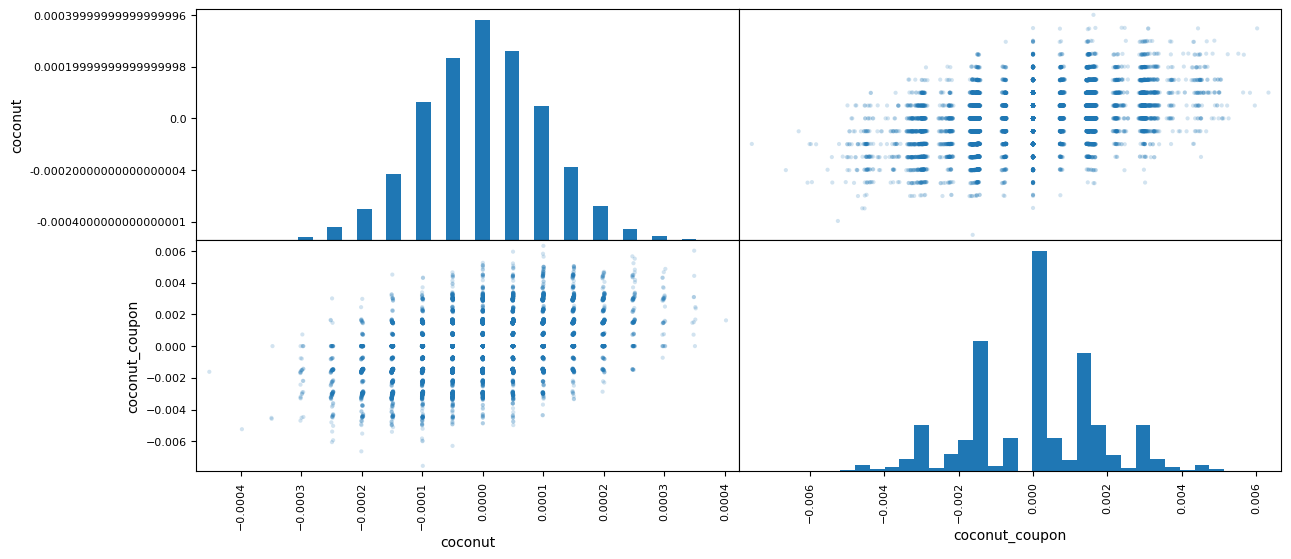

In [8]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

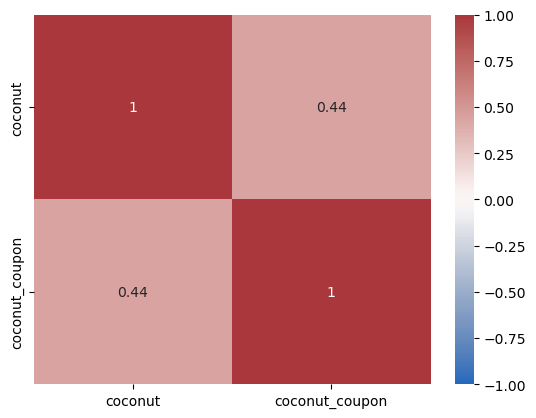

In [9]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [11]:
df1 = pd.read_csv('trades_round_4_day_1_nn.csv',index_col='timestamp', sep=';')

In [12]:
df1


,buyer,seller,symbol,currency,price,quantity
timestamp,,,,,,
800,NaN,NaN,COCONUT_COUPON,SEASHELLS,636.0,5
900,NaN,NaN,COCONUT_COUPON,SEASHELLS,634.0,17
1100,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,17
1900,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,16
2000,NaN,NaN,COCONUT_COUPON,SEASHELLS,637.0,14
...,...,...,...,...,...,...
997800,NaN,NaN,COCONUT_COUPON,SEASHELLS,675.0,12
998200,NaN,NaN,COCONUT_COUPON,SEASHELLS,677.0,10
999200,NaN,NaN,COCONUT_COUPON,SEASHELLS,677.0,7


In [14]:

output_file_path = 'output.csv'


df1.to_csv(output_file_path, sep=';', index_label='timestamp')


In [25]:
from sklearn.linear_model import LinearRegression

# Assuming you have already filtered the DataFrame and renamed the column
# df_coconut = df.loc[df['product']=='COCONUT'][['mid_price']].rename(columns={'mid_price': 'coconut'})

# Prepare the features (X) and target variable (y) for regression
X = df_coconut.index.values.reshape(-1, 1)  # Day numbers as feature
y = df_coconut['coconut'].values.reshape(-1, 1)  # COCONUT prices as target variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the value of COCONUT on day 250
day_250_value = model.predict([[250]])[0][0]

print("Estimated value of COCONUT on day 4:", day_250_value)


Estimated value of COCONUT on day 4: 9955.278020090123
